In [0]:
 %tensorflow_version 1.x

TensorFlow 1.x selected.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!pip install -q git+https://www.github.com/google/neural-tangents

In [0]:
import numpy as np
from jax import random
from jax.experimental import optimizers
from jax.api import jit, grad, vmap
import functools
import neural_tangents as nt
from neural_tangents import stax
import scipy.sparse as sparse
from scipy.sparse import linalg
import matplotlib.pyplot as plt
from matplotlib import cm
import math

In [4]:
full_input=np.genfromtxt('/content/gdrive/My Drive/colab_notebooks/training_input_128_500K.csv',delimiter=',').transpose()
full_output=np.genfromtxt('/content/gdrive/My Drive/colab_notebooks/training_output_128_500K.csv',delimiter=',').transpose()

training_input=full_input[200000:200000+10000,:]
training_output=full_output[200000:200000+10000,:]


#training_input2=full_input[280000:300000,:]
#training_output2=full_output[280000:300000,:]

#training_input=[]
#training_output=[]

#training_input=np.append(training_input1,training_input2,axis=0)
#training_output=np.append(training_output1,training_output2,axis=0)

print('shape of input')
print(np.shape(training_input))


print('shape of output')
print(np.shape(training_output))


train_size=np.size(training_input,0)-1000
index=np.random.permutation(np.size(training_input,0))



std_input=np.std(full_input)
std_output=np.std(full_output)

mean_input=np.mean(full_input)
mean_output=np.mean(full_output)

print(std_input)
print(std_output)

print(mean_input)
print(mean_output)

norm_input=(training_input-mean_input)/std_input
norm_output=(training_output-mean_output)/std_output

input_train=norm_input[index[0:train_size],:]
output_train=norm_output[index[0:train_size],:]

test_input=norm_input[index[train_size:],:]
test_output=norm_output[index[train_size:],:]

shape of input
(10000, 128)
shape of output
(10000, 128)
0.2088514506610205
0.050547073730033504
-1.0194772752925018e-10
-2.381211724925437e-10


In [0]:
print(np.shape(input_train))
print(np.shape(output_train))
print(np.shape(test_input))
print(np.shape(test_output))
print(np.isnan(test_input))


(9000, 128)
(9000, 128)
(1000, 128)
(1000, 128)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [0]:
init_fn, apply_fn, kernel_fn = stax.serial(
    stax.Dense(128, W_std=1.5, b_std=0.05), stax.Erf(),
    stax.Dense(250, W_std=1.5, b_std=0.05), stax.Erf(),
    stax.Dense(250, W_std=1.5, b_std=0.05), stax.Erf(),
    stax.Dense(128, W_std=1.5, b_std=0.05), 

 )


In [0]:
from neural_tangents import predict
mean, var = predict.gp_inference(kernel_fn, input_train, output_train, test_input, \
        diag_reg=1e-1, get='ntk', compute_cov=True)

In [0]:
print(np.shape(mean))
print(np.shape(test_output))
print(np.shape(var))

(1000, 128)
(1000, 128)
(1000, 1000)


In [0]:
NX=128
Lx = np.float64(2*math.pi)
dx = np.float64(Lx/NX)
x =  np.float64(np.linspace(0, Lx-dx, num=NX))

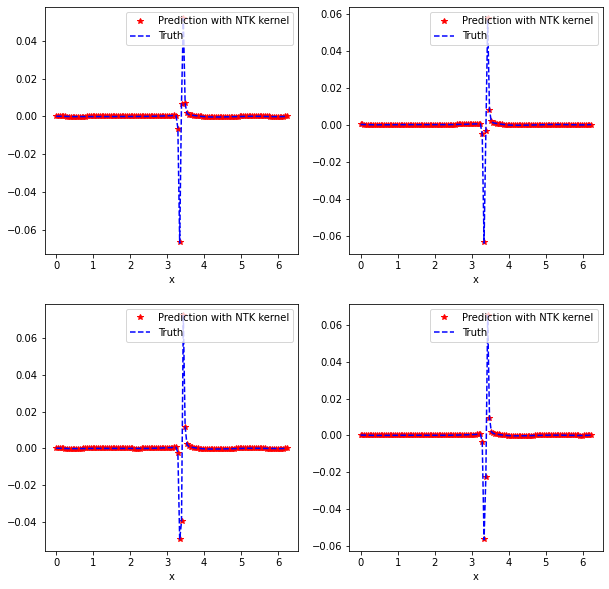

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(x, mean[80,:]*std_output+mean_output,'r*',label='Prediction with NTK kernel')
plt.plot(x, test_output[80,:]*std_output+mean_output,'b--',label='Truth')
plt.xlabel('x')
plt.legend()

plt.subplot(2,2,2)
plt.plot(x, mean[200,:]*std_output+mean_output,'r*',label='Prediction with NTK kernel')
plt.plot(x, test_output[200,:]*std_output+mean_output,'b--',label='Truth')
plt.xlabel('x')
plt.legend()

plt.subplot(2,2,3)
plt.plot(x, mean[400,:]*std_output+mean_output,'r*',label='Prediction with NTK kernel')
plt.plot(x, test_output[400,:]*std_output+mean_output,'b--',label='Truth')
plt.xlabel('x')
plt.legend()

plt.subplot(2,2,4)
plt.plot(x, mean[900,:]*std_output+mean_output,'r*',label='Prediction with NTK kernel')
plt.plot(x, test_output[900,:]*std_output+mean_output,'b--',label='Truth')
plt.xlabel('x')
plt.legend()
